In [1]:
# Load the required libraries
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading different datasets

In [2]:
path = '../data/'

files = os.listdir(path)

print('All files:')
for f in files:
	print(f,end='\t')
    
print('csv files')
for f in files:
    if '.csv' in f:
        print(f,end='\t')


All files:
timesData.csv	cwurData.csv	archive.zip	shanghaiData.csv	school_and_country_table.csv	education_expenditure_supplementary_data.csv	educational_attainment_supplementary_data.csv	csv files
timesData.csv	cwurData.csv	shanghaiData.csv	school_and_country_table.csv	education_expenditure_supplementary_data.csv	educational_attainment_supplementary_data.csv	

## timesData

In [3]:
timesData = pd.read_csv('../data/timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

### Data cleanup
1. international_students: remove %
2. female-male ratio: split column

In [4]:
timesData['international'] = pd.to_numeric(timesData['international'], errors='coerce')
timesData['income'] = pd.to_numeric(timesData['income'], errors='coerce')
timesData['total_score'] = pd.to_numeric(timesData['total_score'], errors='coerce')

In [5]:
def convertcomma(x):
    if isinstance(x, str):
        x = x.replace(',','')
    return x
timesData['num_students']= timesData['num_students'].apply(lambda x: convertcomma(x))
timesData['num_students'] = pd.to_numeric(timesData['num_students'], errors='coerce')

In [6]:
def convertpercentage(x):
    if isinstance(x, str):
        x = x.replace('%','')
    return x
timesData['international_students'] = timesData['international_students'].apply(lambda x: convertpercentage(x))
timesData['international_students'] = pd.to_numeric(timesData['international_students'], errors='coerce')

In [7]:
timesData[['female','male']] = timesData['female_male_ratio'].str.split(':',expand=True) 
timesData['female'] = pd.to_numeric(timesData['female'], errors='coerce')
timesData['male'] = pd.to_numeric(timesData['male'], errors='coerce')

In [8]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
 14  female                  2367 non-null   

# Stanford University

## timesData

In [9]:
timesData_Stanford = timesData[timesData['university_name'].apply(lambda x: 'stanford' in x.lower())]

In [39]:
# Change the ranking to integer
timesData_Stanford.loc[:,'world_rank'] = pd.to_numeric(timesData_Stanford.loc[:,'world_rank'],errors='coerce')

/home/amit/miniconda3/envs/ds_basic/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## cwurData

In [11]:
## cwurData
cwurData = pd.read_csv('../data/cwurData.csv')
cwurData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [12]:
cwurData_Stanford = cwurData[cwurData['institution'].apply(lambda x: 'stanford' in x.lower())]

## shanghaiData

In [13]:
## Shanghai data
shanghaiData = pd.read_csv('../data/shanghaiData.csv')
shanghaiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


In [14]:
shanghaiData_Stanford = shanghaiData[shanghaiData['university_name']=='Stanford University']
shanghaiData_Stanford['world_rank'] = pd.to_numeric(shanghaiData_Stanford['world_rank'],errors='coerce')

<ipython-input-14-9bdb03a2e290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghaiData_Stanford['world_rank'] = pd.to_numeric(shanghaiData_Stanford['world_rank'],errors='coerce')


## Join the 3 datasets for Stanford

In [15]:
cwurData_Stanford.rename(columns={'institution':'university_name'},inplace=True)

/home/amit/miniconda3/envs/ds_basic/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
ranking_Stanford = timesData_Stanford.merge(
    cwurData_Stanford, 
    on=['university_name','year'],
    suffixes=("_times","_cwur")).merge(
    shanghaiData_Stanford, 
    on=['university_name','year'],
    suffixes=(None,"_shan"))

In [17]:
ranking_Stanford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank_times        4 non-null      int64  
 1   university_name         4 non-null      object 
 2   country_times           4 non-null      object 
 3   teaching                4 non-null      float64
 4   international           4 non-null      float64
 5   research                4 non-null      float64
 6   citations_times         4 non-null      float64
 7   income                  4 non-null      float64
 8   total_score             4 non-null      float64
 9   num_students            4 non-null      float64
 10  student_staff_ratio     4 non-null      float64
 11  international_students  4 non-null      float64
 12  female_male_ratio       4 non-null      object 
 13  year                    4 non-null      int64  
 14  female                  4 non-null      float6

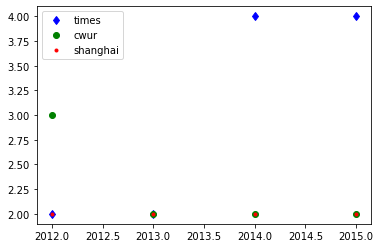

In [35]:
fig, ax = plt.subplots()
ax.plot(ranking_Stanford['year'],ranking_Stanford['world_rank_times'],'bd',label='times')
ax.plot(ranking_Stanford['year'],ranking_Stanford['world_rank_cwur'],'go',label='cwur')
ax.plot(ranking_Stanford['year'],ranking_Stanford['world_rank'],'r.',label='shanghai')
ax.legend()